In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt

In [2]:
yf.pdr_override()
end=dt.datetime.now()
start=dt.datetime(2010,1,1)
stock=['GOOG']
dataframe=pdr.get_data_yahoo(stock, start=start, end=end)
dataframe.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [3]:
dataframe.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17,105.430000,106.709999,105.320000,106.419998,106.419998,29043400
2023-04-18,107.000000,107.050003,104.779999,105.120003,105.120003,17641400
2023-04-19,104.214996,105.724998,103.800003,105.019997,105.019997,16732000
2023-04-20,104.650002,106.888000,104.639999,105.900002,105.900002,22515300
2023-04-21,106.089996,106.639999,105.485001,105.910004,105.910004,22369800


In [ ]:
dataframe=dataframe.reset_index()
dataframe.head()

In [5]:
dataframe=dataframe.drop(['Date','Adj Close'],axis=1)
dataframe.head()

,Open,High,Low,Close,Volume
0,15.615220,15.678981,15.547723,15.610239,78541293
1,15.620949,15.637387,15.480475,15.541497,120638494
2,15.588072,15.588072,15.102393,15.149715,159744526
3,15.178109,15.193053,14.760922,14.797037,257533695
4,14.744733,15.024933,14.672753,14.994298,189680313


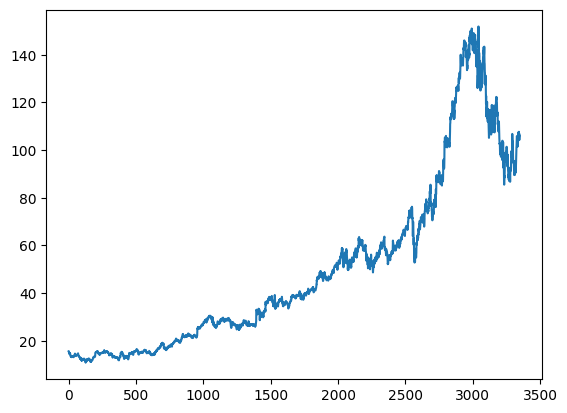

In [6]:
plt.plot(dataframe.Open)

In [7]:
MA100=dataframe.Open.rolling(100).mean()
MA100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3343    96.52162
3344    96.61602
3345    96.69657
3346    96.76967
3347    96.84592
Name: Open, Length: 3348, dtype: float64

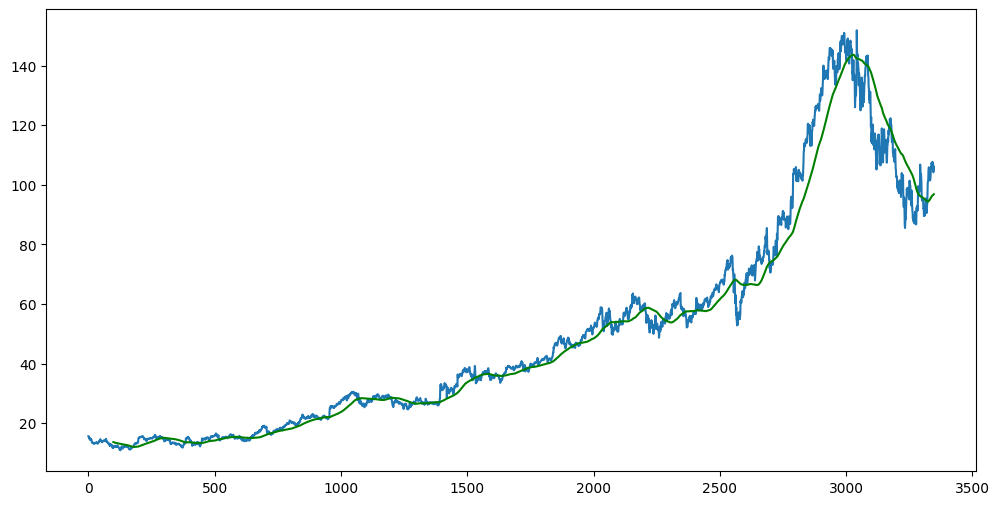

In [8]:
plt.figure(figsize=(12,6))
plt.plot(dataframe.Open)
plt.plot(MA100,'g')

In [9]:
MA200=dataframe.Open.rolling(200).mean()

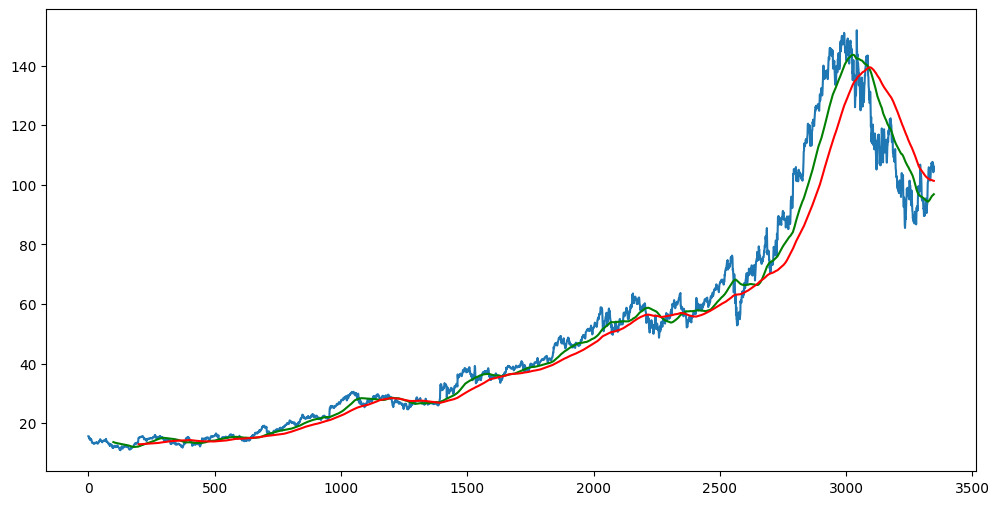

In [10]:
plt.figure(figsize=(12,6))
plt.plot(dataframe.Open)
plt.plot(MA100,'g')
plt.plot(MA200,'r')

In [11]:
dataframe.shape

(3348, 5)

In [12]:
#Splitting Data into training and test Set

data_train=pd.DataFrame(dataframe['Open'][0:int(len(dataframe)*0.70)])
#To take only the Open Column in our dataframe we start from index o of Open column and then take the first 70% of the values

data_test=pd.DataFrame(dataframe['Open'][int(len(dataframe)*0.70): int(len(dataframe))])
#The Test Dataframe will take the remaining 30% values

print(data_train.shape)
print(data_test.shape)

(2343, 1)
(1005, 1)


In [13]:
data_train.head()

,Open
0,15.615220
1,15.620949
2,15.588072
3,15.178109
4,14.744733


In [14]:
data_test.head()

,Open
2343,63.450001
2344,63.700001
2345,59.250000
2346,59.402500
2347,58.388000


In [15]:
data_train.shape

(2343, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_train_array=sc.fit_transform(data_train)
print(data_train_array)

[[0.0892667 ]
 [0.08937554]
 [0.0887509 ]
 ...
 [0.9807061 ]
 [0.99346424]
 [0.99408167]]


In [17]:
x_train=[]
y_train=[]
for i in range(100, data_train.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
x_train.shape

(2243, 100, 1)

In [19]:
#DL Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
regressor=Sequential()
regressor.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation='relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation='relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [22]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 100)

Epoch 1/100
71/71 [==============================] - 19s 208ms/step - loss: 0.0367
Epoch 2/100
71/71 [==============================] - 15s 206ms/step - loss: 0.0075
Epoch 3/100
71/71 [==============================] - 14s 200ms/step - loss: 0.0078
Epoch 4/100
71/71 [==============================] - 15s 209ms/step - loss: 0.0062
Epoch 5/100
71/71 [==============================] - 15s 212ms/step - loss: 0.0059
Epoch 6/100
71/71 [==============================] - 14s 201ms/step - loss: 0.0057
Epoch 7/100
71/71 [==============================] - 14s 197ms/step - loss: 0.0062
Epoch 8/100
71/71 [==============================] - 14s 203ms/step - loss: 0.0050
Epoch 9/100
71/71 [==============================] - 14s 200ms/step - loss: 0.0048
Epoch 10/100
71/71 [==============================] - 14s 201ms/step - loss: 0.0047
Epoch 11/100
71/71 [==============================] - 14s 198ms/step - loss: 0.0045
Epoch 12/100
71/71 [==============================] - 14s 201ms/step - loss: 0.0047
E

In [24]:
regressor.save('stock_pred.h5')

In [25]:
data_test.head()

,Open
2343,63.450001
2344,63.700001
2345,59.250000
2346,59.402500
2347,58.388000


In [26]:
data_train.tail(100)

,Open
2243,53.804001
2244,54.453499
2245,56.157001
2246,55.155998
2247,51.713001
...,...
2338,61.959000
2339,61.799500
2340,62.534500
2341,63.206001


In [27]:
past_100_days=data_train.tail(100)

In [28]:
final_df=pd.concat((past_100_days, data_test),ignore_index=True)

In [29]:
final_df.head()

,Open
0,53.804001
1,54.453499
2,56.157001
3,55.155998
4,51.713001


In [30]:
input_data=sc.fit_transform(final_df)

In [31]:
input_data

array([[0.04952094],
       [0.05581645],
       [0.0723283 ],
       ...,
       [0.53814875],
       [0.5423652 ],
       [0.5563229 ]])

In [32]:
input_data.shape

(1105, 1)

In [33]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [34]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1005, 100, 1)
(1005,)


In [35]:
#Making predictions
y_predicted=regressor.predict(x_test)

32/32 [==============================] - 2s 57ms/step


In [36]:
y_predicted.shape

(1005, 1)

In [37]:
y_test

array([0.14301848, 0.1454417 , 0.10230837, ..., 0.53814875, 0.5423652 ,
       0.5563229 ])

In [38]:
y_predicted

array([[0.2054936 ],
       [0.20817897],
       [0.21116647],
       ...,
       [0.5262105 ],
       [0.5281324 ],
       [0.52870727]], dtype=float32)

In [39]:
sc.scale_

array([0.00969288])

In [40]:
scalor_factor=1/0.00969288
y_predicted=y_predicted*scalor_factor
y_test=y_test*scalor_factor

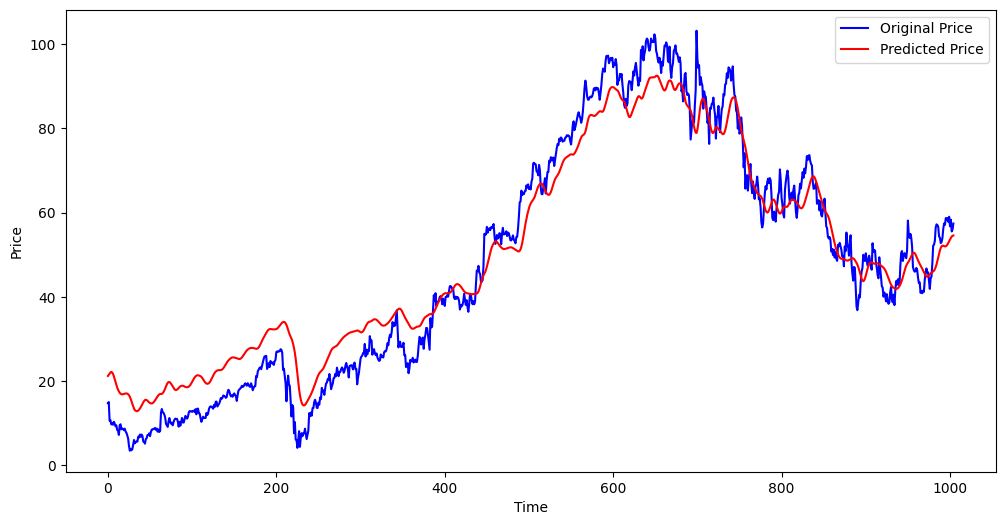

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()